In [ ]:
from google.colab import files
uploaded=files.upload()
#used for importing files

Saving mushrooms (1).csv to mushrooms (1).csv


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [ ]:
data = pd.read_csv('/content/mushrooms (1).csv',dtype="category")

In [ ]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [ ]:
data = data.astype('category')
data.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

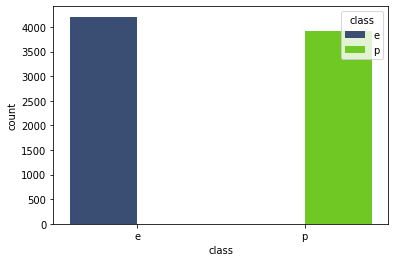

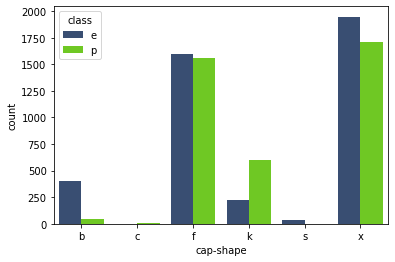

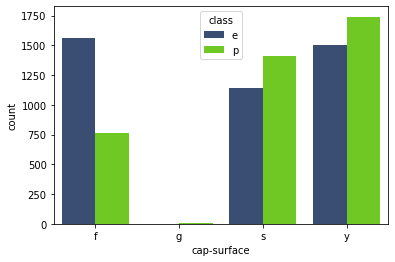

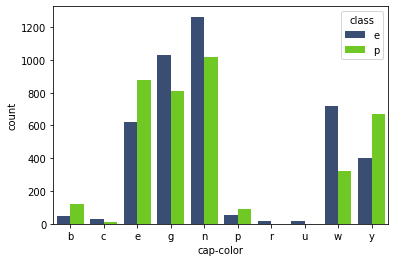

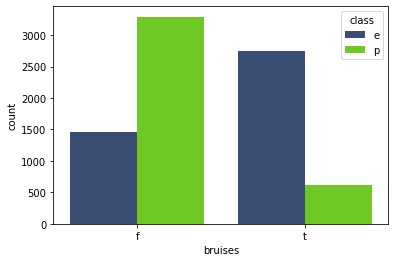

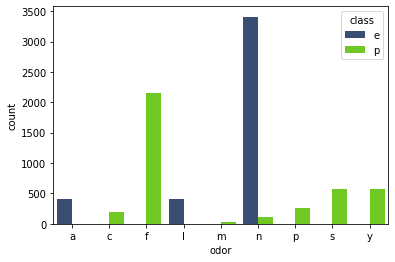

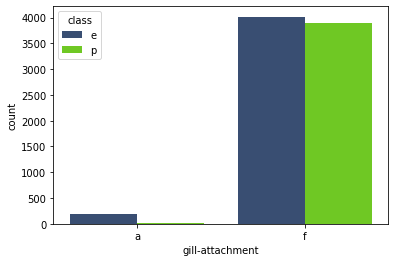

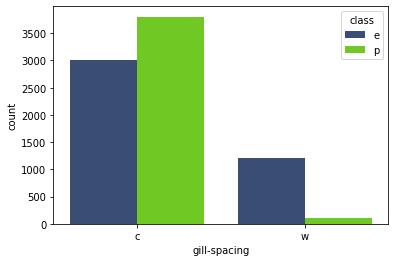

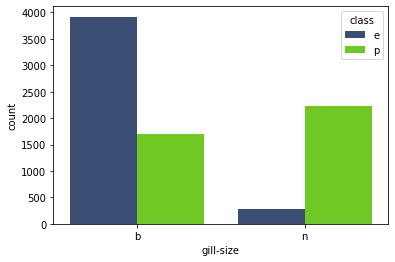

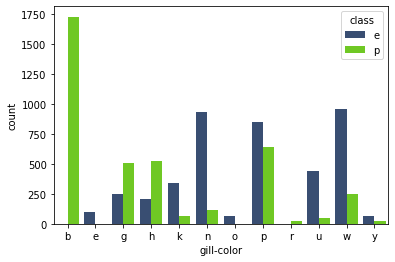

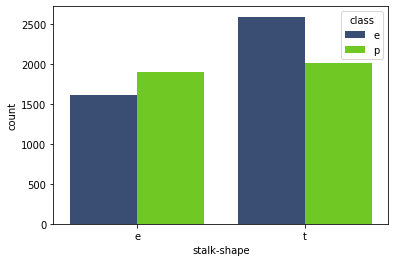

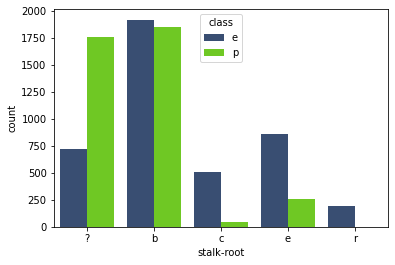

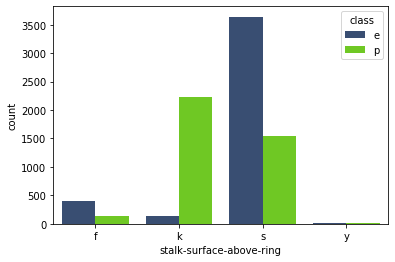

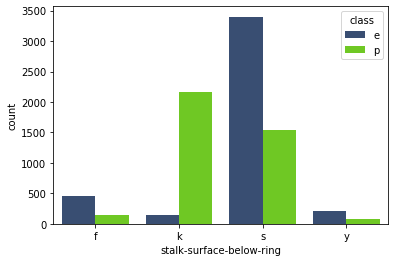

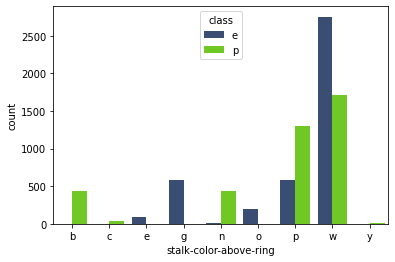

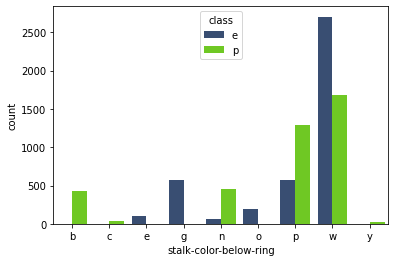

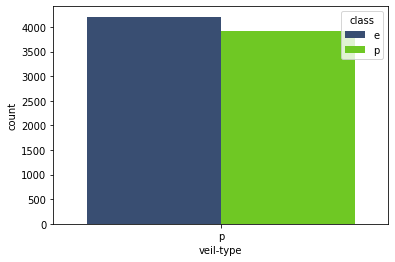

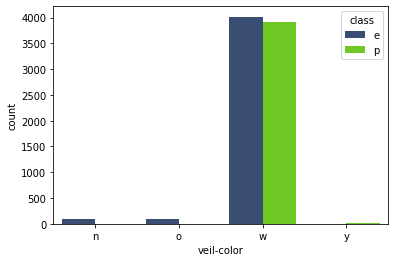

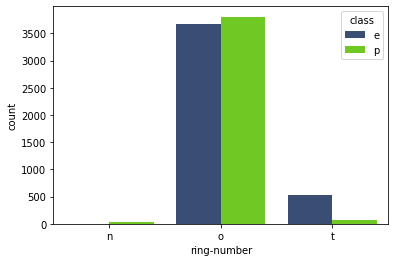

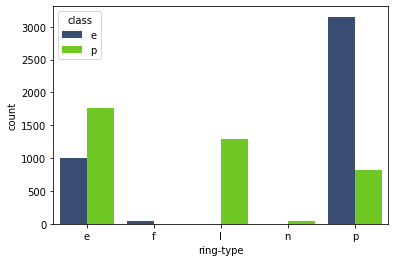

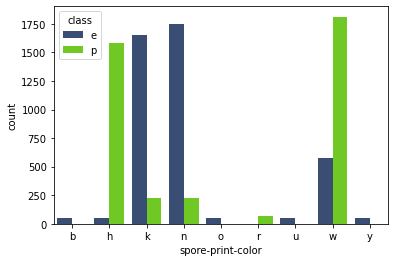

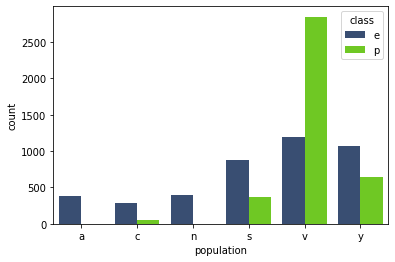

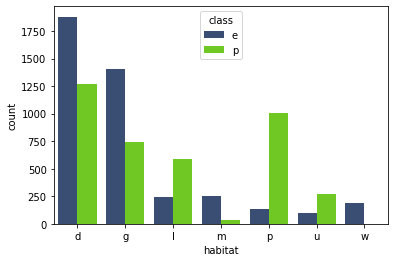

In [ ]:
for i in data.columns:
    sns.countplot(x=i, hue="class", data=data, palette =['#2f4b7c','#6de309'])
    plt.show()

In [ ]:
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])
    data=data.astype('category')

In [ ]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [ ]:
data = data.drop(["veil-type"],axis=1)

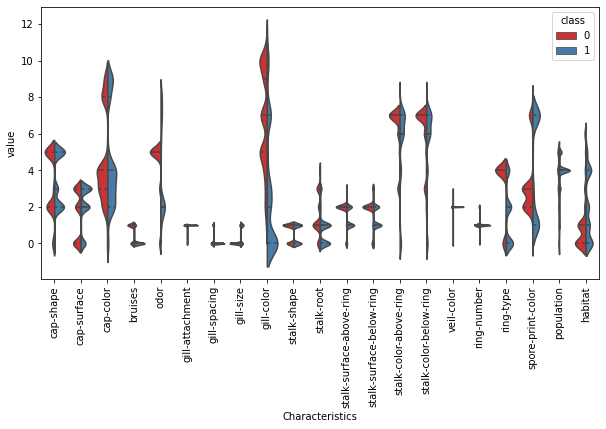

In [ ]:
data_div = pd.melt(data, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=data_div, inner = 'quartile', palette = 'Set1')
data_no_class = data.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(data_no_class.columns));

In [ ]:
X=data.drop(['class'], axis=1)
y=data['class']

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=42 ,test_size = .25)


In [ ]:
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()
X=standardisation.fit_transform(X)
X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

# **random forest**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.values.ravel())
pred=rfc.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, rfc.predict(X_train)))
print(accuracy_score(y_train,rfc.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00      2925

    accuracy                           1.00      6093
   macro avg       1.00      1.00      1.00      6093
weighted avg       1.00      1.00      1.00      6093

1.0


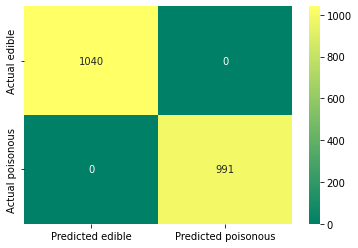

In [ ]:
from sklearn.metrics import confusion_matrix
pred=rfc.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred),columns=["Predicted edible", "Predicted poisonous"], index=["Actual edible", "Actual poisonous"])
sns.heatmap(cm,annot=True, cmap='summer', fmt="d")

## **knn**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train.values.ravel())
pred=knn.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.9960610536681438
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1040
           1       0.99      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, knn.predict(X_train)))
print(accuracy_score(y_train,knn.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00      2925

    accuracy                           1.00      6093
   macro avg       1.00      1.00      1.00      6093
weighted avg       1.00      1.00      1.00      6093

0.9996717544723454


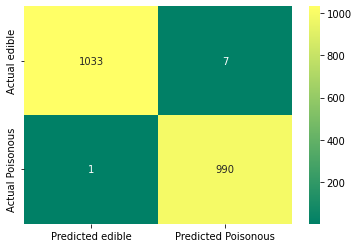

In [ ]:
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred),columns=["Predicted edible", "Predicted Poisonous"], index=["Actual edible", "Actual Poisonous"])
sns.heatmap(cm,annot=True, cmap='summer', fmt="d")

# decision **tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc =DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,pred))

1.0
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1040
           1       0.99      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, dtc.predict(X_train)))
print(accuracy_score(y_train,dtc.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3168
           1       1.00      1.00      1.00      2925

    accuracy                           1.00      6093
   macro avg       1.00      1.00      1.00      6093
weighted avg       1.00      1.00      1.00      6093

1.0


In [ ]:
dtc.score(X_train,y_train)

1.0

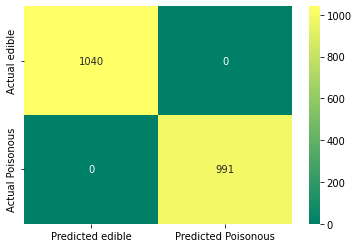

In [ ]:
from sklearn.metrics import confusion_matrix
pred = dtc.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred),columns=["Predicted edible", "Predicted Poisonous"], index=["Actual edible", "Actual Poisonous"])
sns.heatmap(cm,annot=True, cmap='summer', fmt="d")

# **naive bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB as NB
nb =NB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9266371245691778
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1040
           1       0.92      0.93      0.93       991

    accuracy                           0.93      2031
   macro avg       0.93      0.93      0.93      2031
weighted avg       0.93      0.93      0.93      2031



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, nb.predict(X_train)))
print(accuracy_score(y_train,nb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3168
           1       0.93      0.92      0.92      2925

    accuracy                           0.93      6093
   macro avg       0.93      0.93      0.93      6093
weighted avg       0.93      0.93      0.93      6093

0.9261447562776958


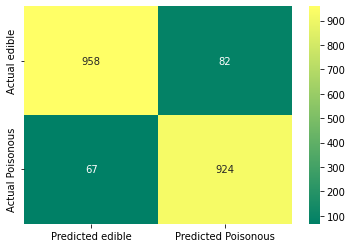

In [ ]:
from sklearn.metrics import confusion_matrix
pred = nb.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred),columns=["Predicted edible", "Predicted Poisonous"], index=["Actual edible", "Actual Poisonous"])
sns.heatmap(cm,annot=True, cmap='summer', fmt="d")

In [ ]:
print(classification_report(y_test, nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1040
           1       0.92      0.93      0.93       991

    accuracy                           0.93      2031
   macro avg       0.93      0.93      0.93      2031
weighted avg       0.93      0.93      0.93      2031



# **svm**

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(X_train,y_train.values.ravel())
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.9596258000984736
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1040
           1       0.95      0.96      0.96       991

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, svm.predict(X_train)))
print(accuracy_score(y_train,svm.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3168
           1       0.96      0.95      0.96      2925

    accuracy                           0.96      6093
   macro avg       0.96      0.96      0.96      6093
weighted avg       0.96      0.96      0.96      6093

0.9599540456261283


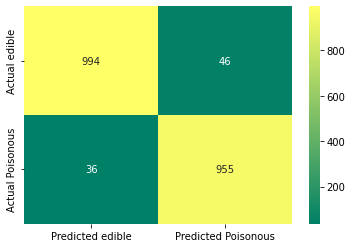

In [ ]:
from sklearn.metrics import confusion_matrix
pred = svm.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, pred),columns=["Predicted edible", "Predicted Poisonous"], index=["Actual edible", "Actual Poisonous"])
sns.heatmap(cm,annot=True, cmap='summer', fmt="d")

In [ ]:
print(classification_report(y_test, svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1040
           1       0.95      0.96      0.96       991

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031

